<a href="https://colab.research.google.com/github/Selva-Subramanian/Zomato-restaurant-clustering-Sentiment-Analysis/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [1]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <b> Importing the required libraries

In [569]:
# for numerical computation
import numpy as np
from operator import add
import math
# for data manipulation 
import pandas as pd
# for creating copies
import copy

# for plotting visuals
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

# for ease of view
from google.colab import data_table
data_table.disable_dataframe_formatter()

# Exploratory Data Analysis
from wordcloud import WordCloud
from prettytable import PrettyTable

# model building
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.cluster.hierarchy as sch

In [570]:
# load the dataset
working_dir_path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter Notebooks/Capstone projects/Zomato Restaurant Analysis and Sentiment Analysis - Selva Subramanian S/'
df1 = pd.read_csv(working_dir_path + 'Zomato Restaurant names and Metadata.csv')
df2 = pd.read_csv(working_dir_path + 'Zomato Restaurant reviews.csv')

### <b> Data Inspection

In [571]:
# sample of the dataset
df1.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [572]:
# brief info of the dataset 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [573]:
# brief description of the dataset
pd.set_option('display.max_rows', None)
df1.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,NorFest - The Dhaba,https://www.zomato.com/hyderabad/aromas11six-g...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [574]:
# columns in the datset
df1.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

#### All restaurants have links and it is not much useful so let's just drop it. 


In [575]:
# Drop columns
df1 = df1.drop(['Links'], axis=1)

In [576]:
# replace null values with a string
df1 = df1.fillna('no info')
df1['Timings'][30] = 'no info'

In [577]:
# change datatype of 'Cost' feature
df1['Cost'] = df1['Cost'].apply(lambda x: int(x.replace(',','')))

In [578]:
# formatting the string in  Timings feature
word_list = [[['noon','Noon','PM','pm'],['p.m.']],[['midnight','Midnight','AM','am'],['a.m.']]]
for i in word_list:
  j = i[1][0]
  for k in i[0]:
    df1['Timings'] = df1['Timings'].str.replace(k,j)

### <b> Exploratory Data Analysis

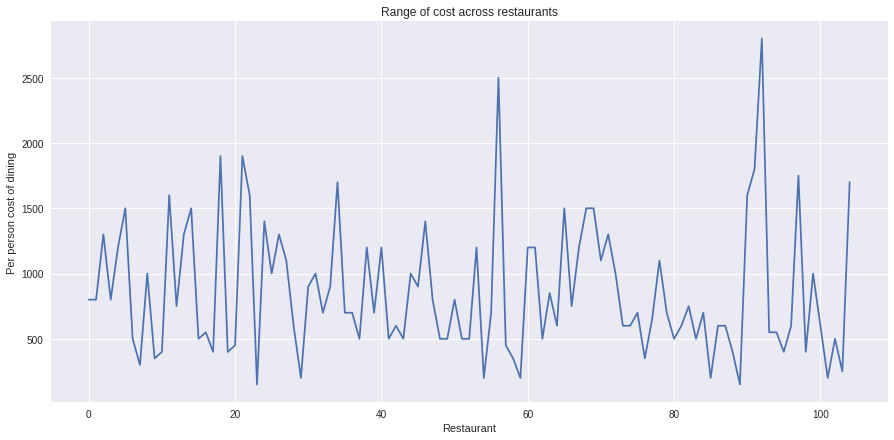

min: 150.0, IQR1:500.0, avg:700.0, IQR3: 1200.0, max: 2800.0


In [579]:
# Analysis of the feature 'Cost'
plt.figure(figsize=(15,7))
df1['Cost'].plot(kind='line')
plt.title("Range of cost across restaurants")
plt.xlabel("Restaurant")
plt.ylabel("Per person cost of dining")
plt.show()
print(f"min: {df1['Cost'].describe()[3]}, IQR1:{df1['Cost'].describe()[4]}, avg:{df1['Cost'].describe()[5]}, IQR3: {df1['Cost'].describe()[6]}, max: {df1['Cost'].describe()[7]}")

#### Most of the restaurants cost of dining per person lies in the range of 500 and 1200 with minimum cost of dining per person at 150 and maximum at 2800 and average cost at 700.

##### <b> Unique values in our features





In [580]:
# initialize empty lists
Unique_Collections = []
Unique_Cuisines = []

# features list
unique_list = [Unique_Collections, Unique_Cuisines]

# logic to extract unique values in the features
sum = 0
for i in df1.columns[2:-1]:
  l = unique_list[sum]
  sum += 1
  for j in range(len(df1[i])):
    for k in list(df1[i])[j].split(','):
      if k not in l and k[1:] not in l:
        if k[0]==' ':
          l.append(k[1:])
        else:
          l.append(k)

# number of unique items in the features
print(f"Total unique values in the feature 'Cost' is {len(df1['Cost'].value_counts())}\n")
for n,m in enumerate(df1.columns[2:-1]):
  print(f"Total unique values in the feature '{m}' is {len(unique_list[n])}\n")

Total unique values in the feature 'Cost' is 29

Total unique values in the feature 'Collections' is 38

Total unique values in the feature 'Cuisines' is 44



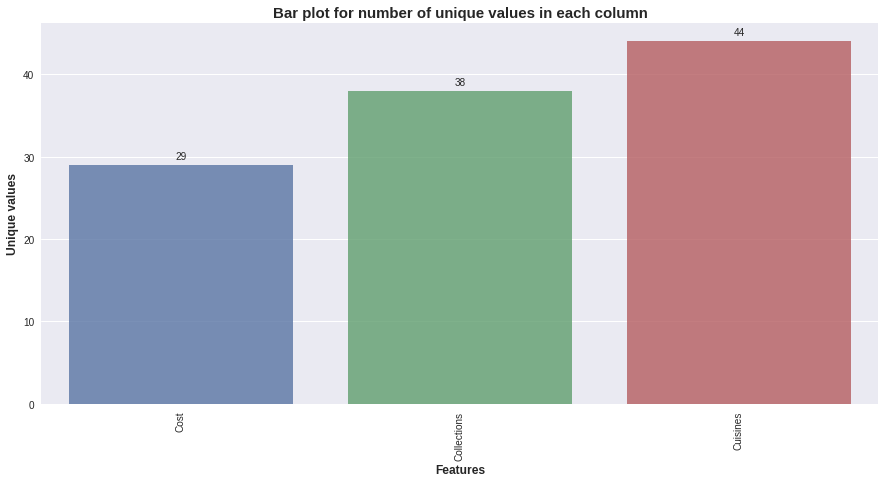

In [581]:
#Counting unique value of features
feature_names = ['Cost', 'Collections', 'Cuisines']
cost = len(df1['Cost'].value_counts())
collections = len(unique_list[0])
cuisines = len(unique_list[1])
feature_count = [cost, collections, cuisines]
f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=feature_names, y=feature_count, alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

In [582]:
# count of unique items in the features
features = ['Collections', 'Cuisines']

# initialize empty dictionaries
unique_count = {}
m = {}

# update unique values of 'Cost' and its frequency of occurence
for l in df1['Cost'].unique():
  m[l] = list(df1['Cost'].values).count(l)
unique_count['Cost'] = m
sum = 0

# initialize empty lists
collections_feature_list = []
cuisines_feature_list = []

# update unique values of 'Collections' and 'Cuisines' 
for i in unique_list:
  if i == unique_list[0]:
    df1[features[sum]] = df1[features[sum]].apply(lambda x: x.split(','))
    df1[features[sum]].apply(lambda x: collections_feature_list.extend(x))
    collections_feature_list = [x[1:] if x[0]==' ' else x[:] for x in collections_feature_list]
  else:
    df1[features[sum]] = df1[features[sum]].apply(lambda x: x.split(','))
    df1[features[sum]].apply(lambda x: cuisines_feature_list.extend(x))
    cuisines_feature_list = [x[1:] if x[0]==' ' else x[:] for x in cuisines_feature_list]
  
  # empty dict for 'Collections' and 'Cuisines'
  k = {}
  # update frequency of occurence
  for j in i:
    if i == unique_list[0]:
      k[j] = collections_feature_list.count(j)
    else:
      k[j] = cuisines_feature_list.count(j)  
  unique_count[features[sum]] = k
  feature_list = []
  sum += 1  

#### *Top 25 most frequent values of the features*

In [583]:
# create a table for a better visual
table = PrettyTable(['SL', 'Cost', 'Collections', 'Cuisines'])
for i in range(1,26):
  table.add_row([i, sorted(unique_count['Cost'].items(), key=lambda x: x[1],reverse = True)[i], sorted(unique_count['Collections'].items(), key=lambda x: x[1], reverse = True)[i], sorted(unique_count['Cuisines'].items(), key=lambda x: x[1], reverse = True)[i]])
table

SL,Cost,Collections,Cuisines
1,"(600, 10)","('Great Buffets', 11)","('Chinese', 43)"
2,"(700, 8)","('Food Hygiene Rated Restaurants in Hyderabad', 8)","('Continental', 21)"
3,"(1200, 7)","('Live Sports Screenings', 7)","('Biryani', 16)"
4,"(1000, 6)","(""Hyderabad's Hottest"", 7)","('Asian', 15)"
5,"(400, 6)","('Corporate Favorites', 6)","('Fast Food', 15)"
6,"(800, 5)","('Top-Rated', 5)","('Italian', 14)"
7,"(1500, 5)","('Gold Curated', 5)","('Desserts', 13)"
8,"(200, 5)","('Trending This Week', 5)","('South Indian', 9)"
9,"(1300, 4)","('Best Bars & Pubs', 4)","('Bakery', 7)"
10,"(350, 3)","('Sunday Brunches', 4)","('Kebab', 6)"


In [584]:
# text for word cloud generation
features = ['Collections', 'Cuisines']

# text corpus of 'Collections' and 'Cuisines'
for i in features:
  if i == 'Collections': 
    collections_feature_list_wo_no_info = []
    for j in collections_feature_list:
      if j != 'no info':
        collections_feature_list_wo_no_info.append(j)
  else:
     for n, m in enumerate(cuisines_feature_list):
      if m in ['North Indian', 'South Indian', 'Street Food']:
        if m == 'North Indian':
          cuisines_feature_list[n] = 'NorthIndian'
        elif m == 'South Indian':
          cuisines_feature_list[n] = 'SouthIndian'
        else:
          cuisines_feature_list[n] = 'StreetFood'

collections_text = ','.join(collections_feature_list_wo_no_info)
cuisines_text = ','.join(cuisines_feature_list)
    
# text corpus of 'Cost'
cost_text = df1['Cost'].value_counts()
cost_text.index = cost_text.index.map(str)

#### *Word cloud for the feature* ***'Cost'***

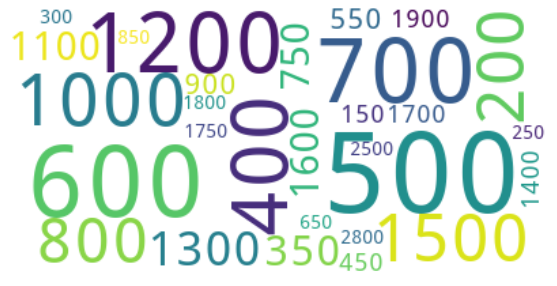

In [585]:
# Creating word_cloud with text as argument in .generate_from_frequencies() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate_from_frequencies(cost_text)

# Display the generated Word Cloud
plt.figure(figsize=(20,5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### *Word cloud for the feature* ***'Collections'*** 

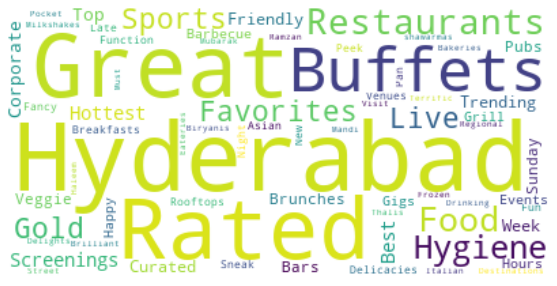

In [586]:
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(collections_text)

# Display the generated Word Cloud
plt.figure(figsize=(20,5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### *Word cloud for the feature* ***'Cuisines'***

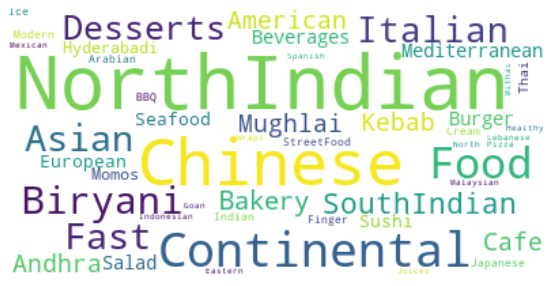

In [587]:
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(cuisines_text)

# Display the generated Word Cloud
plt.figure(figsize=(20,5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### <b> Feature Engineering

#### Clustering is based on similarity which is measured using distance, so it is necessary to have numerical(continuous) columns so as to quantify distance and compute similarity. Let's engineer such features.

In [588]:
# encoded collections
l1 = list(unique_count['Collections'])
c1_dict = {}
for i,j in enumerate(l1):
  c1_dict[j] = i+1

df1['encoded collections'] = copy.deepcopy(df1['Collections'].values)
for k in df1['encoded collections']:
  for l,m in enumerate(k):
    if str(m)[0] == ' ':
      k[l] = c1_dict[str(m)[1:]]
    else:
      k[l] = c1_dict[m]

In [589]:
# encoded cuisines
l2 = list(unique_count['Cuisines'])
c2_dict = {}
for i,j in enumerate(l2):
  c2_dict[j] = i+1

df1['encoded cuisines'] = copy.deepcopy(df1['Cuisines'].values)
for k in df1['encoded cuisines']:
  for l,m in enumerate(k):
    if str(m)[0] == ' ':
      k[l] = c2_dict[str(m)[1:]]
    else:
      k[l] = c2_dict[m]

In [590]:
# function that returns the similarity
def similarity(m, n):
  cl = []
  for i in m:
    sum = 0
    for j in i:
      if j in m[n]:
        sum += 100
    cl.append(sum)
  return cl

In [591]:
# collections quantified
collections_value = similarity(df1['encoded collections'],0)
for i in range(1, len(df1['encoded collections'])):
  to_add = similarity(df1['encoded collections'],i)
  collections_value = list(map(add, collections_value, to_add))

In [592]:
# cuisines quantified
cuisines_value = similarity(df1['encoded cuisines'],0)
for i in range(1, len(df1['encoded cuisines'])):
  to_add = similarity(df1['encoded cuisines'],i)
  cuisines_value = list(map(add, cuisines_value, to_add))

In [593]:
# create new features for clustering
df1['collections similarity'] = collections_value
df1['collections similarity'][df1['collections similarity'] == 5400] = 0
df1['cuisines similarity'] = cuisines_value

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [594]:
# clean the feature 'Timings'
to_process = []
for l,i in enumerate(df1['Timings']):
  ap = []
  c = 0
  for k,j in enumerate(i):
    if j in ['a', 'p'] and j not in ap:
      c = 1
      ap.append(j)
    elif j == '.' and c == 1:
      if i[k-2] != ' ':
        if l not in to_process:
          to_process.append(l)
    else:
      c += 1
  ap = []
for m in to_process:
  df1['Timings'][m] = df1['Timings'][m].replace('a', ' '+'a')
  df1['Timings'][m] = df1['Timings'][m].replace('p', ' '+'p')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [595]:
# function to extract time
def without_days(d):
  time = ''
  append = 1
  for i in d:
    if i == '(':
      append = 0
    if append == 1:
      time += i
    if i == ')':
      append = 1
  return time

In [596]:
# create new encoded feature of 'Timings 
df1['encoded timings'] = copy.deepcopy(df1['Timings'].values)
df1['encoded timings'] = df1['Timings'].apply(lambda x: without_days(x))
df1['encoded timings'] = df1['encoded timings'].apply(lambda x: x.split(','))

In [597]:
# remove unwanted spaces the feature values
for i in range(len(df1['encoded timings'])):
  for j in range(len(df1['encoded timings'][i])):
    df1['encoded timings'][i][j] = df1['encoded timings'][i][j].strip()

In [598]:
# treat special cases with a different approach
l = [20,26,72,95]
for i in l:
  df1['encoded timings'][i] = df1['encoded timings'][i][:-1]
df1['encoded timings'][30] = ['1 a.m. to 12 p.m.']
df1['encoded timings'][53] = df1['encoded timings'][53][0:2]
df1['encoded timings'][91] = ['1 a.m. to 12 p.m.']
df1['encoded timings'][92] = ['1 a.m. to 12 p.m.']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Se

In [599]:
# function to extract time as list values
def time(t):
  time_list = []
  empty_list = []
  for a in range(len(t)):
    i = t[a].find('t')

    empty_list.append(t[a][:i-1])
    empty_list.append(t[a][i+3:])
    time_list.append(list(empty_list))
    empty_list = []
    return time_list

In [600]:
# call the time function on encoded values
df1['encoded timings'] = df1['encoded timings'].apply(lambda x: time(x))

In [601]:
# creature a dictionary of encoded values
time_dict = {}
for i in range(1,13):
  time_dict[str(i)+' a.m.'] = i
  time_dict[str(i)+':30'+' a.m.'] = i+0.5
  time_dict[str(i)+' p.m.'] = i+12
  time_dict[str(i)+':30'+' p.m.'] = i+12+0.5
time_dict['12 a.m.'] = 0
time_dict['12 p.m.'] = 12
time_dict['12:30 a.m.'] = 0.5
time_dict['10:40 p.m.'] = 22.65
time_dict['6:45 p.m.'] = 18.75
time_dict['11:55 a.m.'] = 11.95
time_dict['11:15 p.m.'] = 23.25

In [602]:
# encode the values of 'Timings' as per the encoded dict
for k in range(len(df1['encoded timings'])): 
  for i in range(len(df1['encoded timings'][k])):
    for j in range(len(df1['encoded timings'][k][i])):
      df1['encoded timings'][k][i][j] = time_dict[df1['encoded timings'][k][i][j]]  

In [603]:
# logic to create a list of encoded values to call in range function
for j in range(len(df1['encoded timings'])):
  for i in range(len(df1['encoded timings'][j])):
    if df1['encoded timings'][j][i][0] >= 12:
      first = df1['encoded timings'][j][i][0]
      next = df1['encoded timings'][j][i][1]
      df1['encoded timings'][j] = [[first,24],[0,next]]
    if df1['encoded timings'][j][i][0] < 12:
      first = df1['encoded timings'][j][i][0]
      next = df1['encoded timings'][j][i][1]
      df1['encoded timings'][j] = [[first,12],[12,next]]
for j in range(len(df1['encoded timings'])):
  for i in range(len(df1['encoded timings'][j])):
    if df1['encoded timings'][j][i][0] > df1['encoded timings'][j][i][1]:
      first = df1['encoded timings'][j][i][0]
      next = df1['encoded timings'][j][i][1]
      if next <= 12:
        df1['encoded timings'][j] = [[first,12],[12,24],[0,next]]
      if next > 12:
        df1['encoded timings'][j] = [[first,12],[12,next]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipy

In [604]:
# use range to extract all values in between 
for j in range(len(df1['encoded timings'])):
  for i in range(len(df1['encoded timings'][j])):
    df1['encoded timings'][j][i] = list(range(int(df1['encoded timings'][j][i][0]), int(df1['encoded timings'][j][i][1])))

In [605]:
# update the final list of encoded timings
for k in range(len(df1['encoded timings'])):
  final_list = []
  for i in range(len(df1['encoded timings'][k])):
    for j in df1['encoded timings'][k][i]:
      if j not in final_list:
        final_list.append(j)
  df1['encoded timings'][k] = final_list
  final_list = []

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [606]:
# get similarity scores by calling the similarity function
timings_similarity = similarity(df1['encoded timings'],0)
for i in range(1, len(df1['encoded timings'])):
  to_add = similarity(df1['encoded timings'],i)
  timings_similarity = list(map(add, timings_similarity, to_add))
df1['timings similarity'] = timings_similarity

In [607]:
# overview of refined dataset
data_table.DataTable(df1, include_index=False, num_rows_per_page=25)

,Name,Cost,Collections,Cuisines,Timings,encoded collections,encoded cuisines,collections similarity,cuisines similarity,encoded timings,timings similarity
0,Beyond Flavours,800,"[Food Hygiene Rated Restaurants in Hyderabad, ...","[Chinese, Continental, Kebab, European, So...","12 p.m. to 3:30 p.m., 6:30 p.m. to 11:30 p.m. ...","[1, 2, 3, 4, 5, 6]","[1, 2, 3, 4, 5, 6]",4200,14400,"[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 2...",166500
1,Paradise,800,[Hyderabad's Hottest],"[Biryani, North Indian, Chinese]",11 a.m. to 11 p.m.,[7],"[7, 6, 1]",700,12000,"[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]",111500
2,Flechazo,1300,"[Great Buffets, Hyderabad's Hottest]","[Asian, Mediterranean, North Indian, Desserts]","11:30 a.m. to 4:30 p.m., 6:30 p.m. to 11 p.m.","[3, 7]","[8, 9, 6, 10]",1800,9400,"[11, 12, 13, 14, 15]",45500
3,Shah Ghouse Hotel & Restaurant,800,[Late Night Restaurants],"[Biryani, North Indian, Chinese, Seafood, ...",12 p.m. to 2 a.m.,[8],"[7, 6, 1, 11, 12]",200,12900,"[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 2...",122200
4,Over The Moon Brew Company,1200,"[Best Bars & Pubs, Food Hygiene Rated Restaur...","[Asian, Continental, North Indian, Chinese,...","12 p.m. to 11 p.m. (Mon, Tue, Wed, Thu, Sun), ...","[9, 1, 4, 5, 7]","[8, 2, 6, 1, 9]",2900,14500,"[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 2...",166500
5,The Fisherman's Wharf,1500,"[Sunday Brunches, Corporate Favorites, Great...","[Seafood, Goan, North Indian, Continental, ...","12 p.m. to 3:30 p.m., 4 p.m. to 6:30 p.m., 7 p...","[10, 2, 3, 7, 1, 4, 5]","[11, 13, 6, 2, 8]",4600,10200,"[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 2...",166500
6,eat.fit,500,[Food Hygiene Rated Restaurants in Hyderabad],"[Healthy Food, North Indian, Continental, S...",7 a.m. to 10 p.m.,[1],"[14, 6, 2, 5]",800,9200,"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, ...",120200
7,Shah Ghouse Spl Shawarma,300,[no info],[Lebanese],12 p.m. to 12 a.m.,[11],[15],0,100,"[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]",112500
8,Hyper Local,1000,"[Great Buffets, Live Sports Screenings, Best...","[American, Chinese, North Indian, Kebab, S...",12 p.m. to 12 a.m.,"[3, 6, 9, 12]","[16, 1, 6, 3, 5]",2700,12500,"[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]",112500
9,Cream Stone,350,[Frozen Delights],"[Ice Cream, Desserts]","10 a.m. to 1 a.m. (Mon-Thu), 10 a.m. to 1:30 a...",[13],"[17, 10]",100,1500,"[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 2...",117600


### <b> Clustering Implementation

In [608]:
# Silhouette score
scaler = MinMaxScaler()
df1[['Cost', 'collections similarity', 'cuisines similarity', 'timings similarity']] = scaler.fit_transform(df1[['Cost', 'collections similarity', 'cuisines similarity', 'timings similarity']])
features = ['Cost', 'collections similarity']
X = df1[features].values
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5713470370418322
For n_clusters = 3, silhouette score is 0.5757716906414043
For n_clusters = 4, silhouette score is 0.4102540838528923
For n_clusters = 5, silhouette score is 0.44242221296471546
For n_clusters = 6, silhouette score is 0.4447289503035192
For n_clusters = 7, silhouette score is 0.4621509413320371
For n_clusters = 8, silhouette score is 0.48787908178150535
For n_clusters = 9, silhouette score is 0.4940944301008564
For n_clusters = 10, silhouette score is 0.4828226451591353
For n_clusters = 11, silhouette score is 0.45883129766067243
For n_clusters = 12, silhouette score is 0.49253642628233607
For n_clusters = 13, silhouette score is 0.4707813735405182
For n_clusters = 14, silhouette score is 0.500560087179919
For n_clusters = 15, silhouette score is 0.48828732034176636


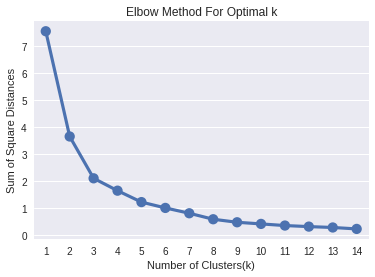

In [609]:
# elbow method for optimal k
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#  plot the graph for the sum of square distance values and number of clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [610]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

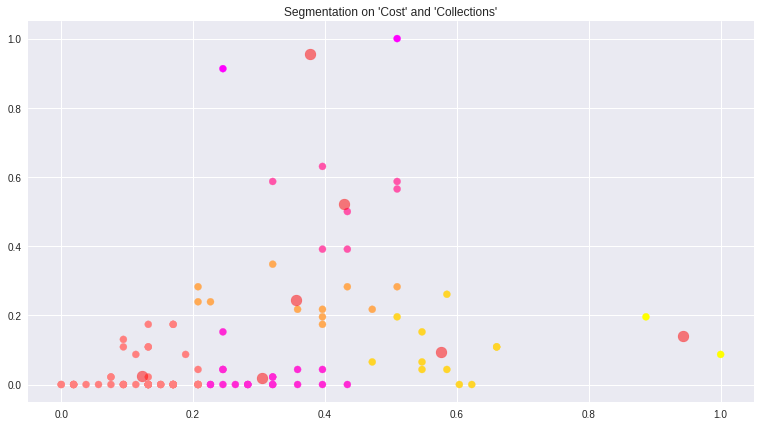

In [611]:
plt.figure(figsize=(13,7))
plt.title("Segmentation on 'Cost' and 'Collections'")
plt.scatter(df1['Cost'], df1['collections similarity'], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=120, alpha=0.5)

In [612]:
features = ['collections similarity', 'cuisines similarity']
X = df1[features].values
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5173745233651911
For n_clusters = 3, silhouette score is 0.5222696657849767
For n_clusters = 4, silhouette score is 0.5269265738945129
For n_clusters = 5, silhouette score is 0.5415587596551346
For n_clusters = 6, silhouette score is 0.5367508560190206
For n_clusters = 7, silhouette score is 0.5219339814889842
For n_clusters = 8, silhouette score is 0.49955036536500635
For n_clusters = 9, silhouette score is 0.49066310900692117
For n_clusters = 10, silhouette score is 0.5119560575014171
For n_clusters = 11, silhouette score is 0.5144339142253619
For n_clusters = 12, silhouette score is 0.5208968492572408
For n_clusters = 13, silhouette score is 0.4747582999439858
For n_clusters = 14, silhouette score is 0.474185958551134
For n_clusters = 15, silhouette score is 0.48087034858976246


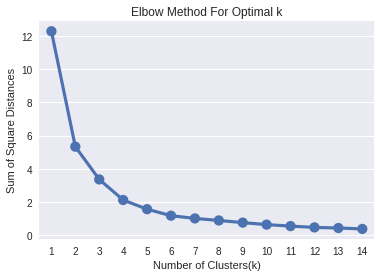

In [613]:
# elbow method for optimal k
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#  plot the graph for the sum of square distance values and number of clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [614]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

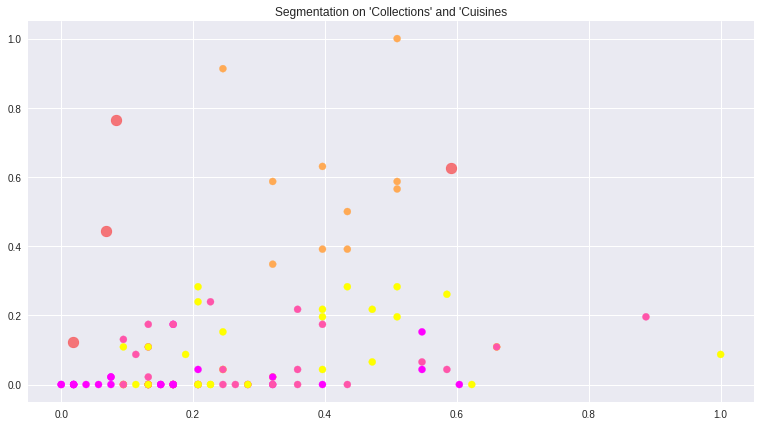

In [615]:
plt.figure(figsize=(13,7))
plt.title("Segmentation on 'Collections' and 'Cuisines")
plt.scatter(df1['Cost'], df1['collections similarity'], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=120, alpha=0.5)

### cost vs benefit analysis

In [616]:
features = ['cuisines similarity', 'Cost']
X = df1[features].values
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4881479583020236
For n_clusters = 3, silhouette score is 0.46546871475380314
For n_clusters = 4, silhouette score is 0.45487251690969854
For n_clusters = 5, silhouette score is 0.4791220670408508
For n_clusters = 6, silhouette score is 0.46769058217172443
For n_clusters = 7, silhouette score is 0.4667803679711471
For n_clusters = 8, silhouette score is 0.4417148692769214
For n_clusters = 9, silhouette score is 0.43869515284457905
For n_clusters = 10, silhouette score is 0.4105316178884691
For n_clusters = 11, silhouette score is 0.4029038569374043
For n_clusters = 12, silhouette score is 0.39070199531754624
For n_clusters = 13, silhouette score is 0.3870099309092299
For n_clusters = 14, silhouette score is 0.3856595444014555
For n_clusters = 15, silhouette score is 0.4040445537078581


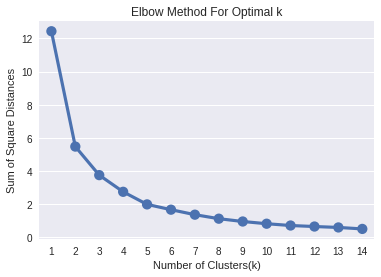

In [617]:
# elbow method for optimal k
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#  plot the graph for the sum of square distance values and number of clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [618]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

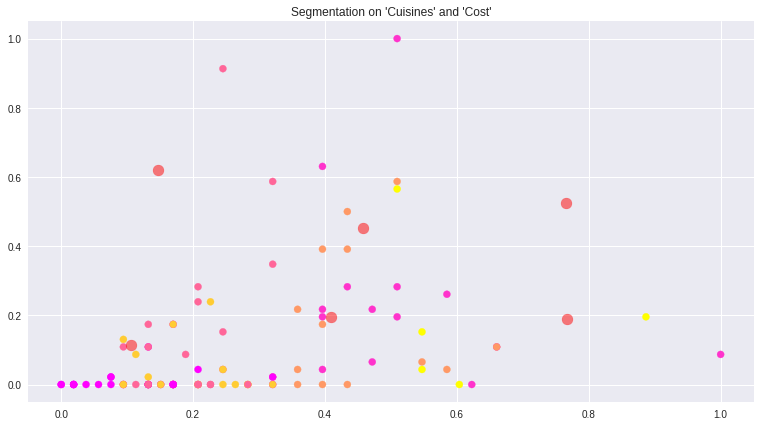

In [619]:
plt.figure(figsize=(13,7))
plt.title("Segmentation on 'Cuisines' and 'Cost'")
plt.scatter(df1['Cost'], df1['collections similarity'], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=120, alpha=0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


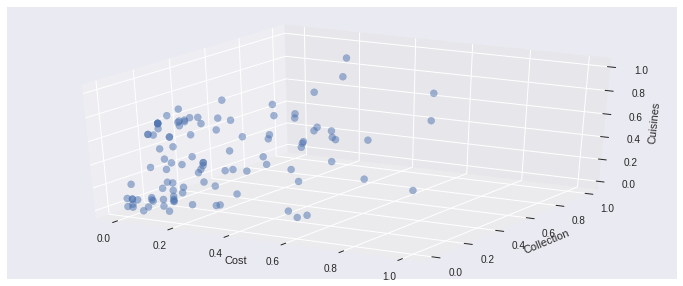

In [620]:
# 3D visualization 
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(12,5))
plt.title('3d visualization of Cost, Collections and Cuisines')
ax=fig.add_subplot(111,projection='3d')
xs=df1['Cost']
ys=df1['collections similarity']
zs=df1['cuisines similarity']
ax.scatter(xs,ys,zs,s=50,alpha=0.5)
ax.set_xlabel('Cost')
ax.set_ylabel('Collection')
ax.set_zlabel('Cuisines')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.41604430560827255
For n_clusters = 3 The average silhouette_score is : 0.3999023844551345
For n_clusters = 4 The average silhouette_score is : 0.4163176965196534
For n_clusters = 5 The average silhouette_score is : 0.40799447524988736
For n_clusters = 6 The average silhouette_score is : 0.42873686320178583
For n_clusters = 7 The average silhouette_score is : 0.4380976643593193
For n_clusters = 8 The average silhouette_score is : 0.42816183111513456
For n_clusters = 9 The average silhouette_score is : 0.4077432358541486
For n_clusters = 10 The average silhouette_score is : 0.377108193533982


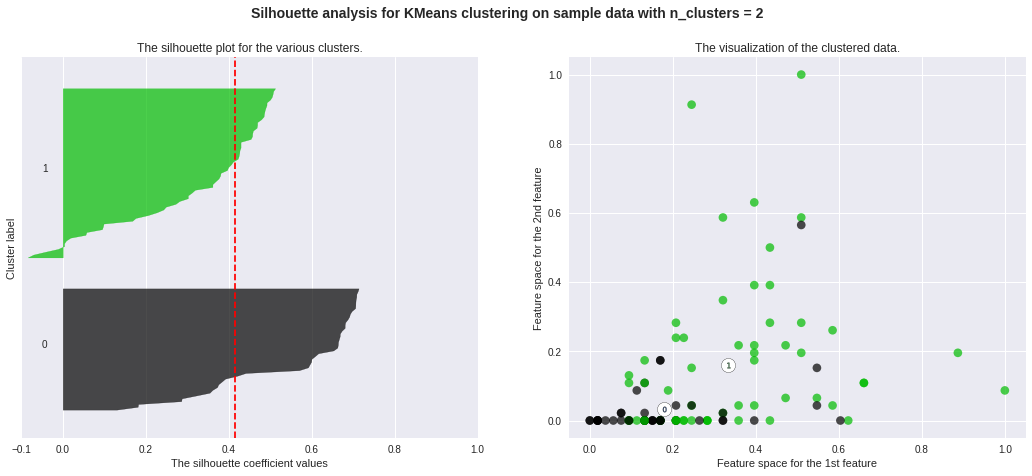

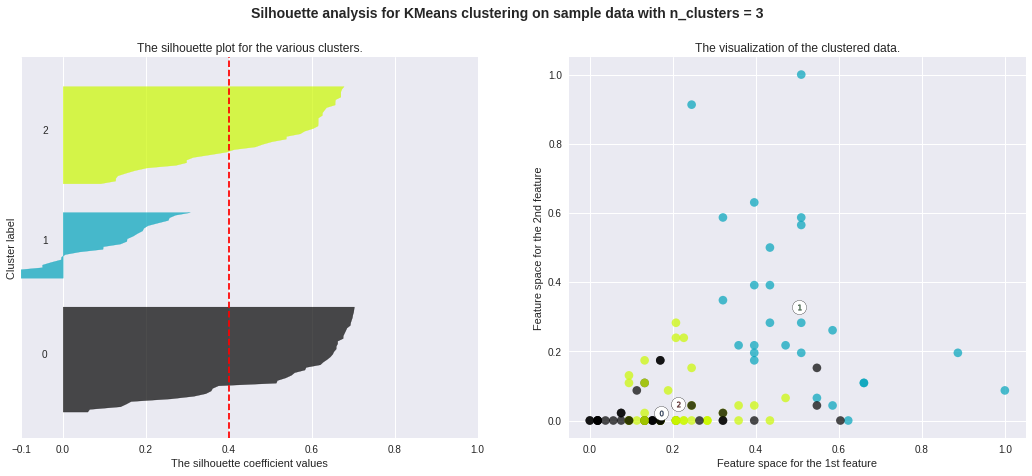

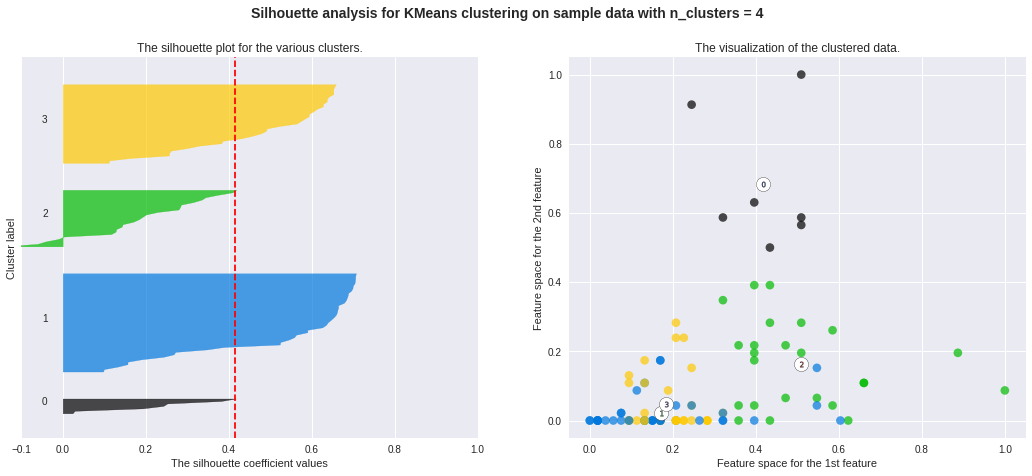

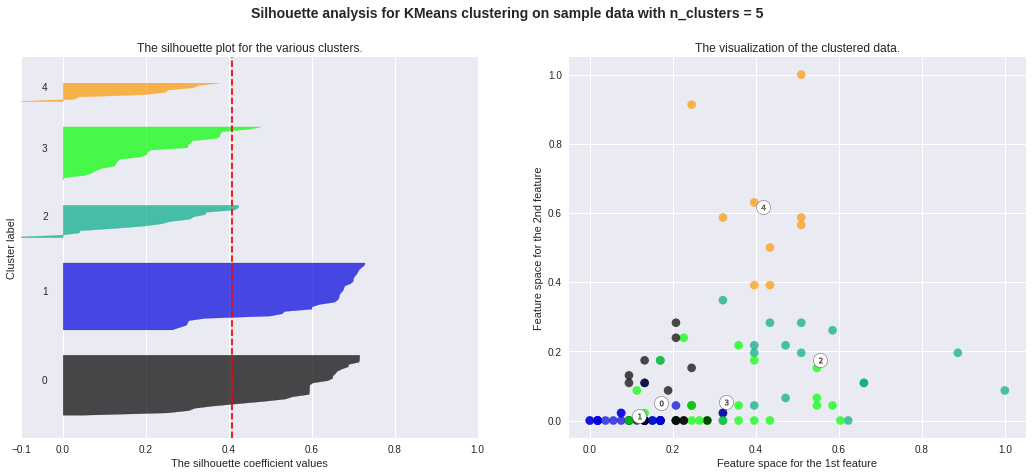

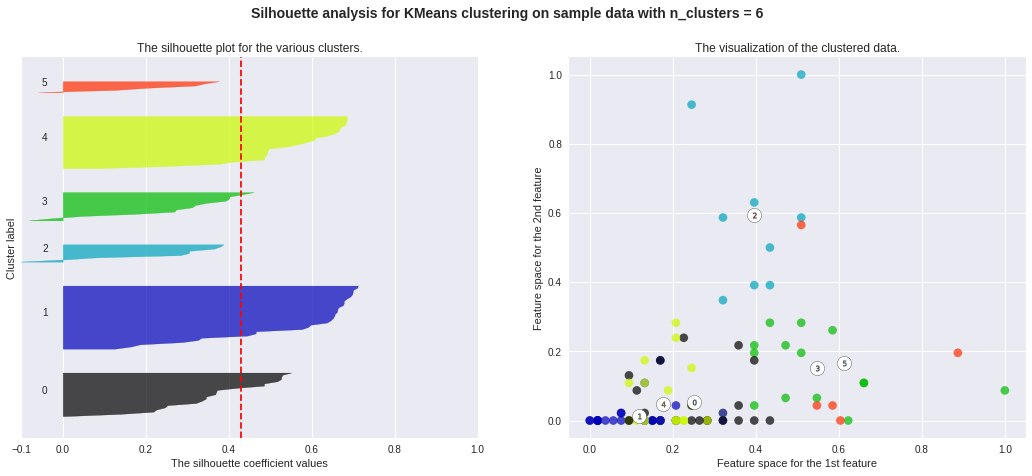

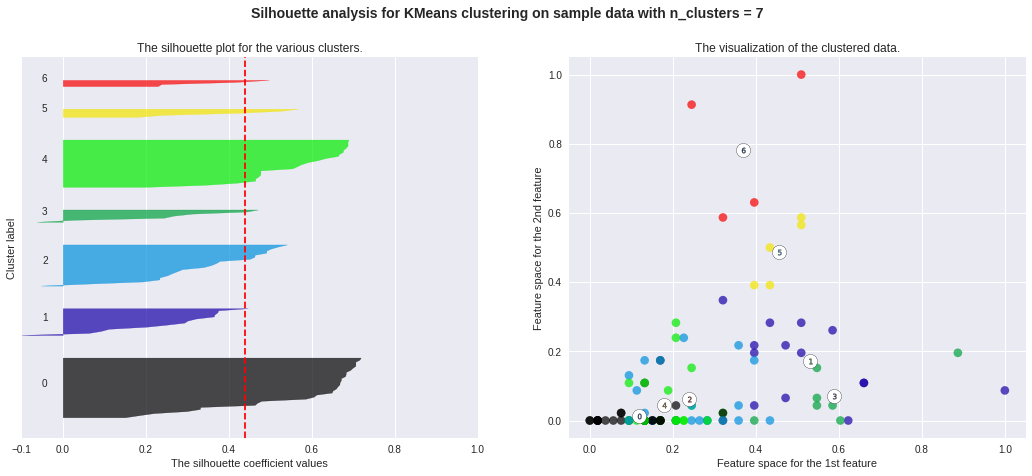

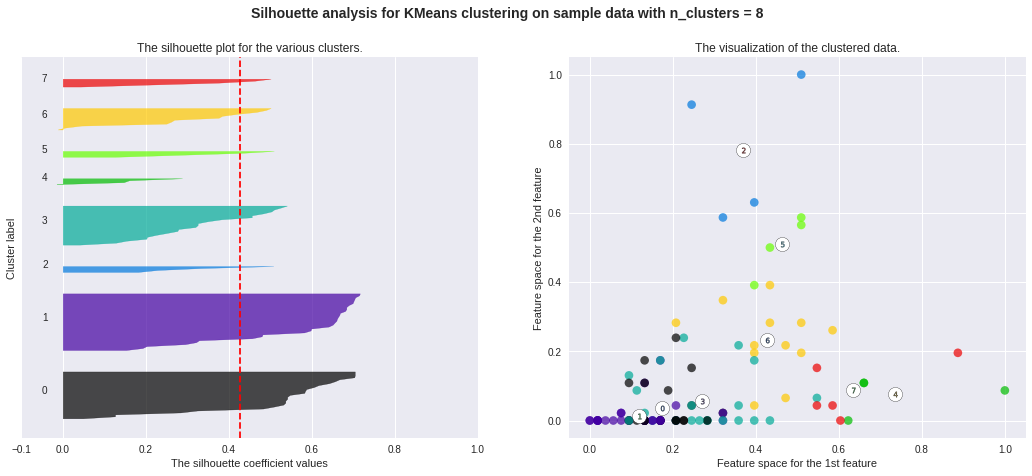

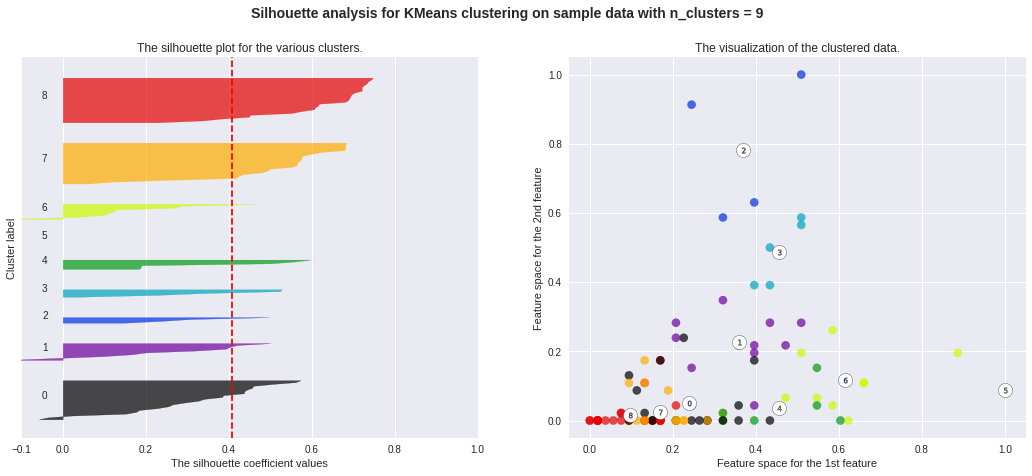

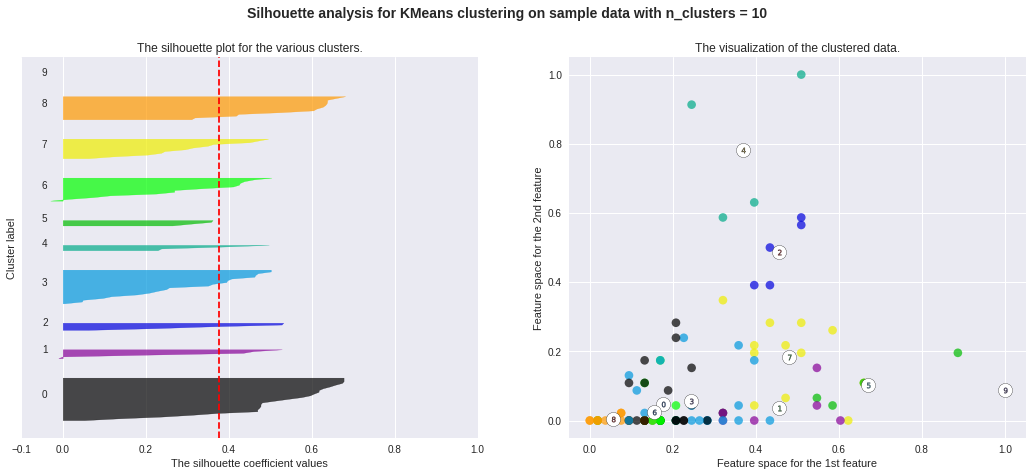

In [621]:
features = ['Cost', 'collections similarity', 'cuisines similarity']
X = df1[features].values

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=300, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=30, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

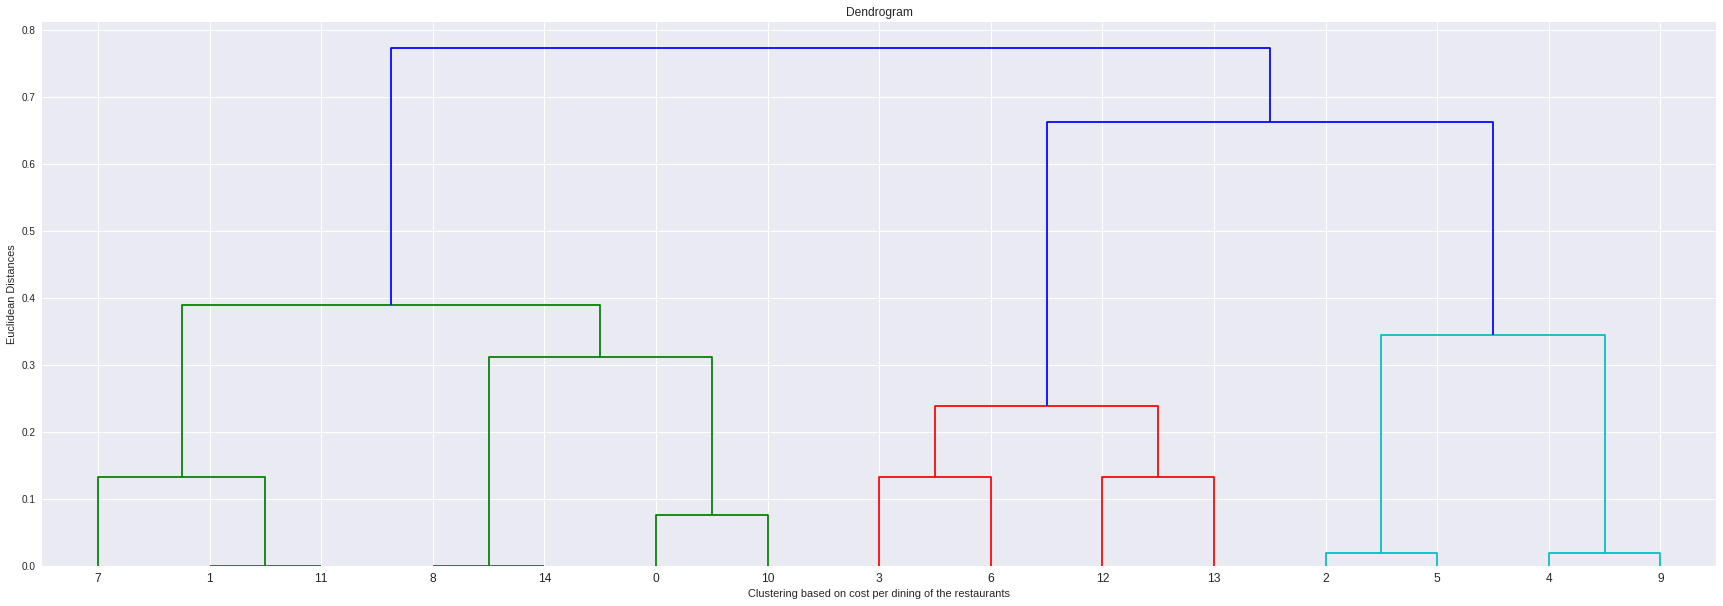

In [622]:
# Plot dendrogram
plt.figure(figsize=(30,10))
dendrogram = sch.dendrogram(sch.linkage(df1['Cost'], method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Clustering based on cost per dining of the restaurants')
plt.ylabel('Euclidean Distances')
plt.show()

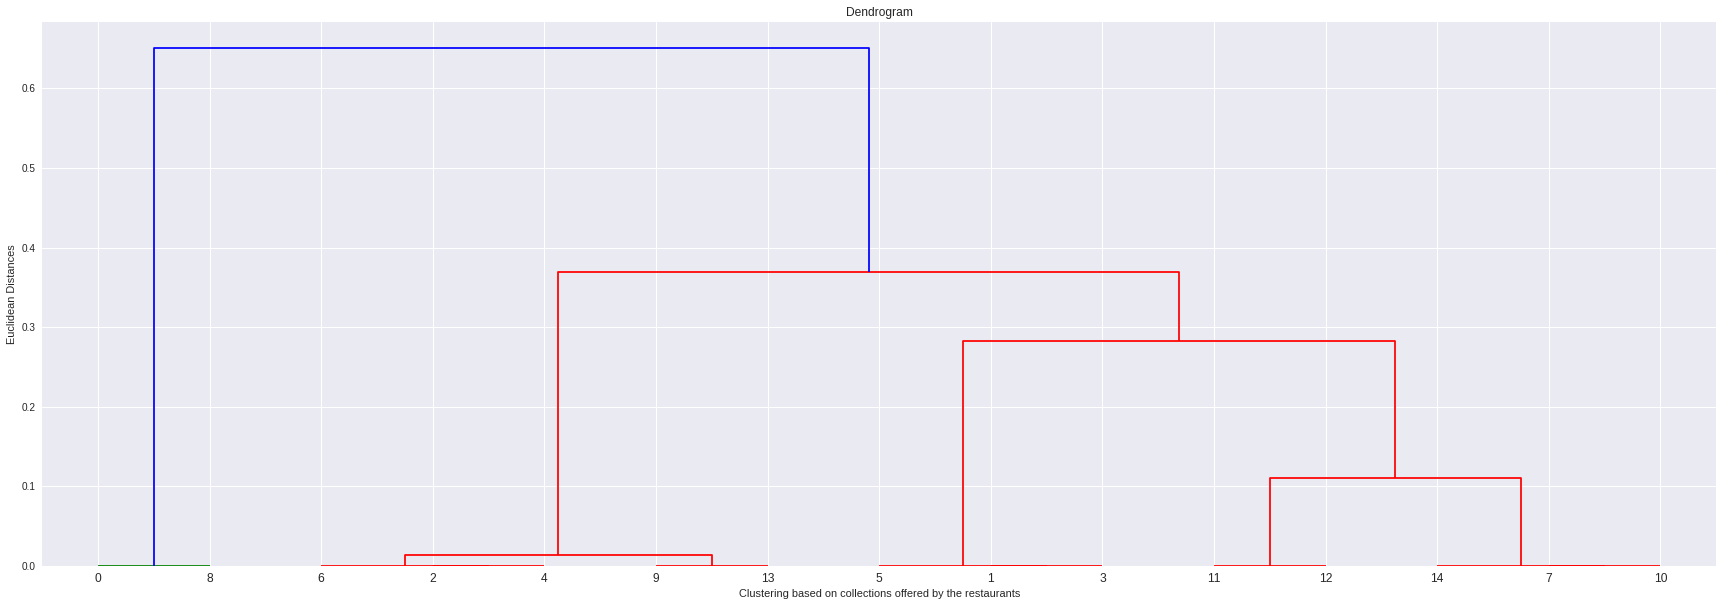

In [623]:
# Plot dendrogram
plt.figure(figsize=(30,10))
dendrogram = sch.dendrogram(sch.linkage(df1['collections similarity'], method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Clustering based on collections offered by the restaurants')
plt.ylabel('Euclidean Distances')
plt.show()

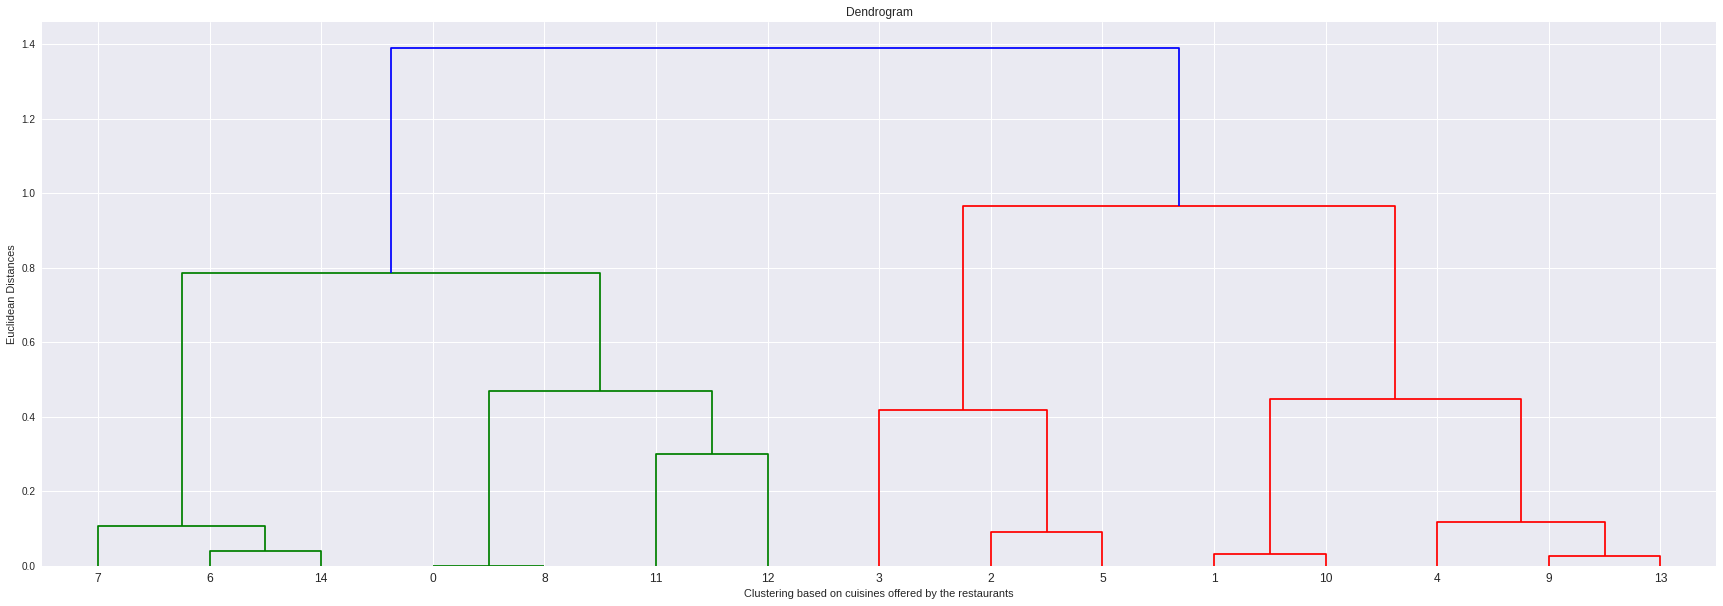

In [624]:
# Plot dendrogram
plt.figure(figsize=(30,10))
dendrogram = sch.dendrogram(sch.linkage(df1['cuisines similarity'], method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Clustering based on cuisines offered by the restaurants')
plt.ylabel('Euclidean Distances')
plt.show()

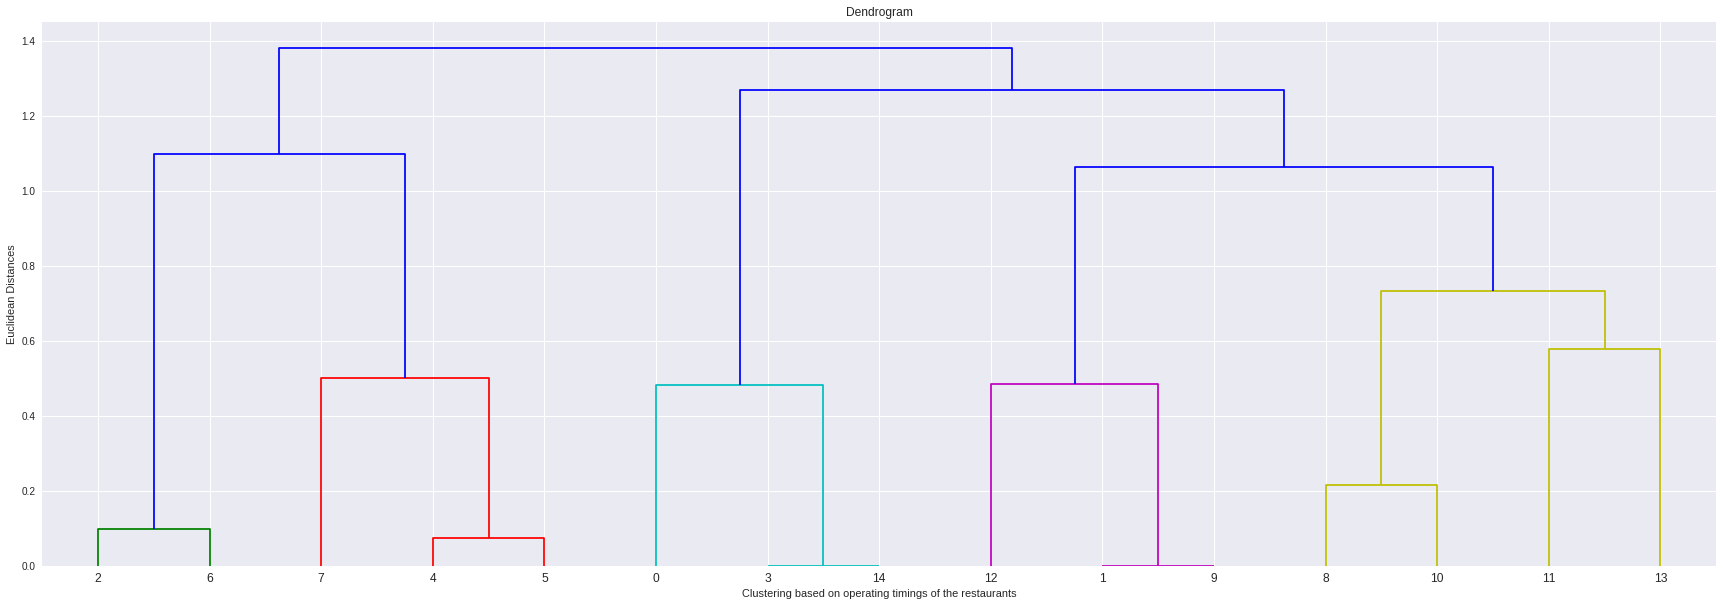

In [625]:
# Plot dendrogram
plt.figure(figsize=(30,10))
dendrogram = sch.dendrogram(sch.linkage(df1['timings similarity'], method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Clustering based on operating timings of the restaurants')
plt.ylabel('Euclidean Distances')
plt.show()

In [626]:
df2.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
